# Data exploratory analysis focused on lightning systems 

In [11]:
# Import main libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
# Main functions

# Get measurements for a given house_id
def get_house_data(df, house_id, start=0, ending=len(df), features=df.columns):  
    return df[df['dataid']==house_id][features][start:ending]

# Plot house daily profile
def house_plot(df, house_id, day_start, day_end, feature='use'):    
    plt.figure(figsize=(16,10))
    house_data = get_house_data(df, house_id, features=feature)
    plt.plot(house_data[1440*day_start:1440*day_end])
    plt.show()

In [6]:
df = pd.read_csv('dataport-light-2016.csv')

In [7]:
df.head()

,localminute,dataid,use,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6
0,2016-01-01 00:00:00-06,624,0.284,0.008,0.004,0.104,0.0,0.000,0.000
1,2016-01-01 00:00:00-06,9085,0.165,0.003,0.000,0.009,0.0,0.048,0.007
2,2016-01-01 00:01:00-06,624,0.292,0.008,0.004,0.112,0.0,0.000,0.000
3,2016-01-01 00:01:00-06,9085,0.165,0.003,0.000,0.009,0.0,0.048,0.007
4,2016-01-01 00:02:00-06,9085,0.165,0.003,0.000,0.009,0.0,0.048,0.007


It is not clear if the first sample was acquired at midnight or at (midnight - 6 hours) = 6PM

## Plot daily profile

In [146]:
# Input parameters
house_id = 9085
day_start = 8
day_end = 9

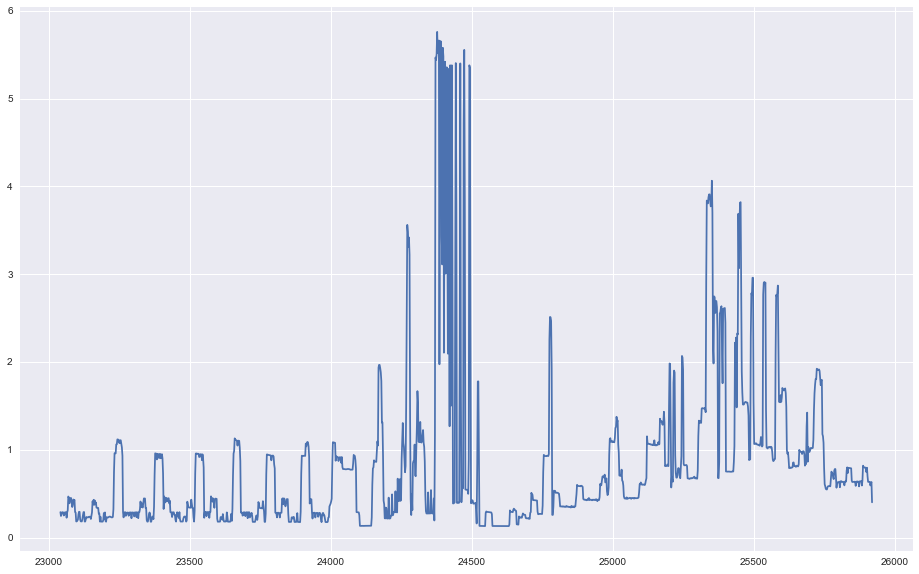

In [147]:
house_plot(df, house_id, day_start, day_end)

## Heatmap plot

In [ ]:
# Input parameters
house_id = 9085

In [151]:
def heatmap_plot(df, house_id):
    house_data = get_house_data(df, house_id, start=0, ending=-1, features='use')
    matrix = house_data.values.reshape(367, 1440)
    plt.figure(figsize=(16,100))
    sns.heatmap(matrix, cbar=False)

### House ID = 9085

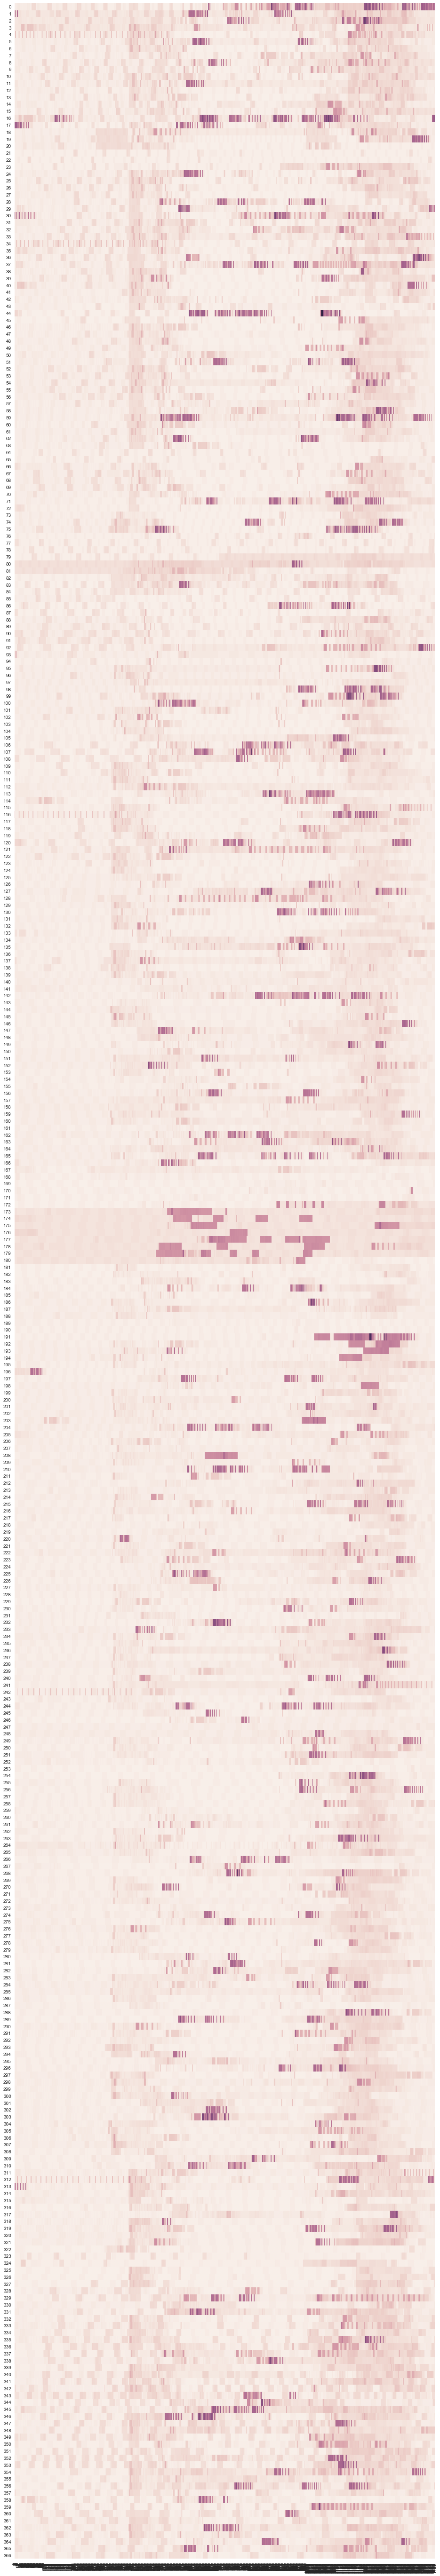

In [152]:
heatmap_plot(df, house_id)

### House ID = 624

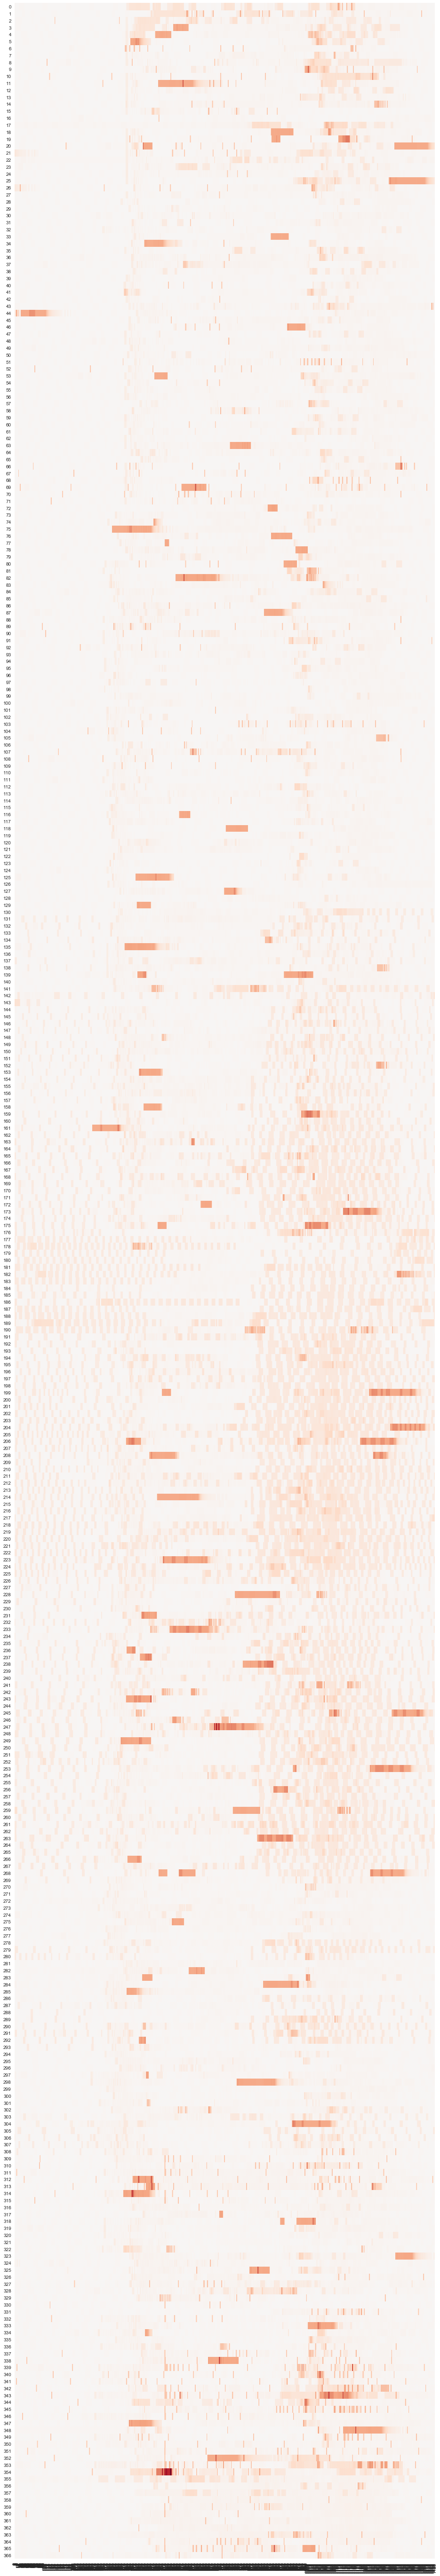

In [153]:
house_id = 624
heatmap_plot(df, house_id)

In [96]:
house_data['localminute'] = pd.to_datetime(house_data['localminute'])

In [107]:
house_data['minute'] = house_data['localminute'].apply(lambda x: x.minute)
house_data['hour'] = house_data['localminute'].apply(lambda x: x.hour)
house_data['day'] = house_data['localminute'].apply(lambda x: x.day)
house_data['month'] = house_data['localminute'].apply(lambda x: x.month)
house_data['year'] = house_data['localminute'].apply(lambda x: x.year)

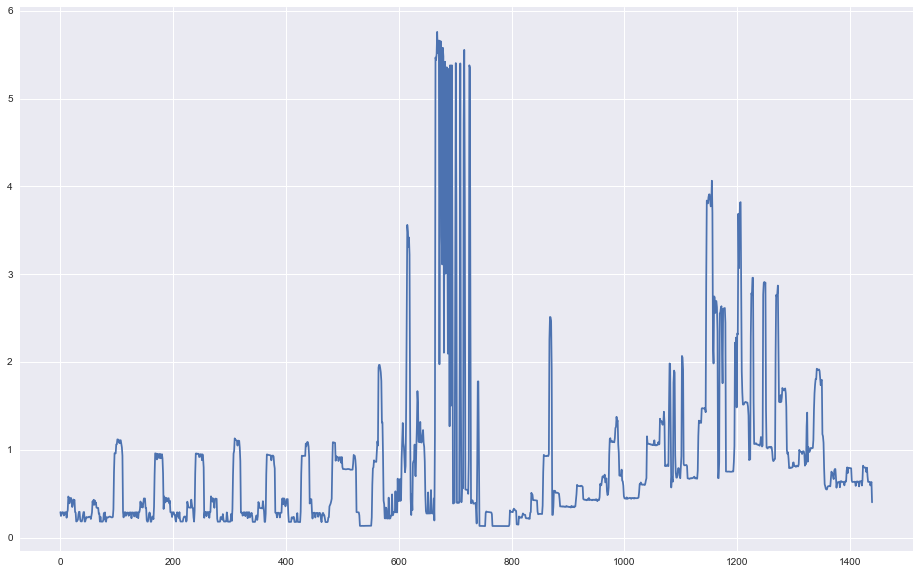

In [150]:
# Check of each line of the matrix corresponds the energy profile of a day
plt.figure(figsize=(16,10))
plt.plot(matrix[8][:])